In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/My Drive/data science/datascientist salary prediction/dataset/DataAnalyst.csv')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [163]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,city,state,h_city,h_state
0,Junior Data Analyst,37-66,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66,New York,NY,New York,NY
1,Junior Data Analyst,37-66,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37,66,New York,NY,New York,NY
2,Senior Data Analyst,37-66,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37,66,New York,NY,New York,NY
3,Junior Data Analyst,37-66,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37,66,New York,NY,McLean,VA
4,Junior Data Analyst,37-66,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,New York,NY,New York,NY


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2252
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2081 non-null   object 
 1   Salary Estimate    2081 non-null   object 
 2   Job Description    2081 non-null   object 
 3   Rating             2081 non-null   float64
 4   Company Name       2081 non-null   object 
 5   Location           2081 non-null   object 
 6   Headquarters       2081 non-null   object 
 7   Size               2081 non-null   object 
 8   Founded            2081 non-null   int64  
 9   Type of ownership  2081 non-null   object 
 10  Industry           2081 non-null   object 
 11  Sector             2081 non-null   object 
 12  Revenue            2081 non-null   object 
 13  Competitors        2081 non-null   object 
 14  Easy Apply         2081 non-null   object 
 15  min_salary         2081 non-null   int64  
 16  max_salary         2081 

In [9]:
df.describe()

,Rating,Founded
count,2253.000000,2253.000000
mean,3.160630,1398.522858
std,1.665228,901.929251
min,-1.000000,-1.000000
25%,3.100000,-1.000000
50%,3.600000,1979.000000
75%,4.000000,2002.000000
max,5.000000,2019.000000


In [10]:
df['Job Title']

0       Data Analyst, Center on Immigration and Justic...
1                                    Quality Data Analyst
2       Senior Data Analyst, Insights & Analytics Team...
3                                            Data Analyst
4                                  Reporting Data Analyst
                              ...                        
2248    RQS - IHHA - 201900004460 -1q Data Security An...
2249                Senior Data Analyst (Corporate Audit)
2250    Technical Business Analyst (SQL, Data analytic...
2251                  Data Analyst 3, Customer Experience
2252                          Senior Quality Data Analyst
Name: Job Title, Length: 2253, dtype: object

In [12]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split(' ')[0])

In [14]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K',''))

In [57]:
df['min_salary'] =  df['Salary Estimate'].apply(lambda x: x.split('-')[0])
df['max_salary'] =  df['Salary Estimate'].apply(lambda x: x.split('-')[1])

In [61]:
def tryconvert(value, default, *types):
    for t in types:
        try:
            return t(value)
        except (ValueError, TypeError):
            continue
    return default

In [66]:
df['min_salary'] = df['min_salary'].apply(lambda x: tryconvert(x, 0, int))
df['max_salary'] = df['max_salary'].apply(lambda x: tryconvert(x, 0, int))

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
 15  min_salary         2253 non-null   int64  
 16  max_salary         2253 

In [68]:
df.describe()

,Rating,Founded,min_salary,max_salary
count,2253.000000,2253.000000,2253.000000,2253.000000
mean,3.160630,1398.522858,54.242787,89.939636
std,1.665228,901.929251,19.604393,29.368984
min,-1.000000,-1.000000,0.000000,1.000000
25%,3.100000,-1.000000,41.000000,70.000000
50%,3.600000,1979.000000,50.000000,87.000000
75%,4.000000,2002.000000,64.000000,104.000000
max,5.000000,2019.000000,113.000000,190.000000


In [73]:
df = df[~df['min_salary'] < 10]

In [ ]:
### junior, Senior, Sr, Student

In [120]:
df['Job Title'] = df['Job Title'].apply(lambda x: 'Senior Data Analyst' if('Senior' or 'Sr') in x else 'Junior Data Analyst')

In [129]:
df['city'] = df['Location'].apply(lambda x: x.split(',')[0].strip())
df['state'] = df['Location'].apply(lambda x: x.split(',')[1].strip())

In [142]:
df = df[~(df['Headquarters']=='-1')]

In [144]:
df['h_city'] = df['Headquarters'].apply(lambda x: x.split(',')[0].strip())
df['h_state'] = df['Headquarters'].apply(lambda x: x.split(',')[1].strip())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
len(df['Industry'].unique())

89

In [165]:
col = ['Salary Estimate','Company Name', 'Location', 'Headquarters', 'Founded', 'Easy Apply', 'Competitors']
df.drop(col, axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [181]:
df.reset_index(drop = True, inplace=True)

In [ ]:
df['same_city'] = 0
for i in range(len(df)):
  if(df['city'][i] == df['h_city'][i]):
    df['same_city'][i] = 1

In [227]:
df.head()

,Job Title,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,city,state,h_city,h_state,same_city
0,Junior Data Analyst,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37,66,New York,NY,New York,NY,1
1,Junior Data Analyst,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37,66,New York,NY,New York,NY,1
2,Senior Data Analyst,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37,66,New York,NY,New York,NY,1
3,Junior Data Analyst,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37,66,New York,NY,McLean,VA,0
4,Junior Data Analyst,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37,66,New York,NY,New York,NY,1


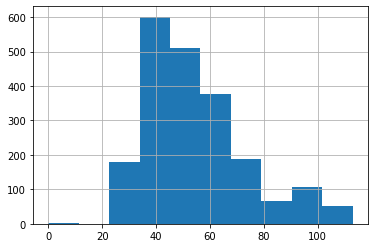

In [168]:
df['min_salary'].hist()

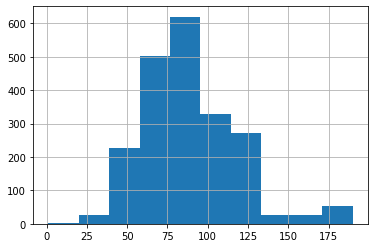

In [169]:
df['max_salary'].hist()

In [194]:
df.groupby('same_city')['min_salary'].mean()

same_city
0    53.894663
1    54.744292
Name: min_salary, dtype: float64

In [191]:
df.groupby('same_city')['max_salary'].mean()

same_city
0    89.488062
1    90.634703
Name: max_salary, dtype: float64

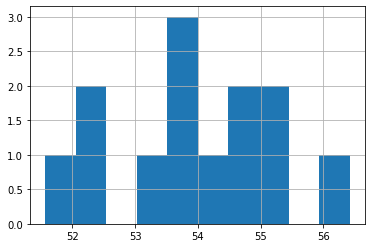

In [229]:
df.groupby('Revenue')['min_salary'].mean()

In [200]:
df.groupby('Sector')['min_salary'].mean().sort_values(ascending = False)

Sector
Biotech & Pharmaceuticals             61.363636
Arts, Entertainment & Recreation      60.428571
Accounting & Legal                    58.511628
Real Estate                           57.250000
Travel & Tourism                      57.000000
Manufacturing                         56.250000
Health Care                           55.364238
Information Technology                55.311072
Insurance                             54.901961
Business Services                     54.486538
-1                                    54.440860
Construction, Repair & Maintenance    53.812500
Transportation & Logistics            53.400000
Consumer Services                     53.142857
Aerospace & Defense                   51.954545
Media                                 51.833333
Education                             51.807692
Telecommunications                    51.727273
Finance                               50.644970
Non-Profit                            49.115385
Retail                           

In [201]:
df.groupby('Industry')['min_salary'].mean().sort_values(ascending = False)

Industry
News Outlet                           84.000000
Drug & Health Stores                  82.500000
Education Training Services           69.666667
Health Care Products Manufacturing    69.200000
Sports & Recreation                   69.000000
                                        ...    
Casual Restaurants                    36.200000
Preschool & Child Care                35.666667
Trucking                              35.000000
Grocery Stores & Supermarkets         28.333333
Audiovisual                           24.000000
Name: min_salary, Length: 89, dtype: float64

In [204]:
df.groupby('Type of ownership')['min_salary'].mean().sort_values(ascending = False)

Type of ownership
Hospital                          59.789474
Unknown                           57.187500
Private Practice / Firm           55.888889
Contract                          55.363636
Company - Private                 54.465613
Company - Public                  54.351770
College / University              53.882353
Subsidiary or Business Segment    53.741573
Nonprofit Organization            52.935484
Other Organization                52.583333
Franchise                         50.500000
School / School District          46.333333
Government                        45.189189
Self-employed                     42.000000
Name: min_salary, dtype: float64

In [220]:
a = df.groupby('Rating')['max_salary'].mean()

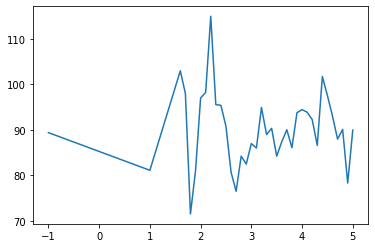

In [222]:
import matplotlib.pyplot as plt
plt.plot(a)

In [ ]:
df.groupby('Job Title')['min_salary'].mean().sort_values(ascending = False)

In [ ]:
col = ['Size', 'Rating', 'Job Description']
df.drop(col, axis = 1, inplace=True)

In [ ]:
col = ['Job Description']
df.drop(col, axis = 1, inplace=True)

In [ ]:
col = ['Industry']
df.drop(col, axis = 1, inplace=True)

In [ ]:
col = ['Revenue']
df.drop(col, axis = 1, inplace=True)

In [231]:
df.head()

,Job Title,Type of ownership,Sector,min_salary,max_salary,city,state,h_city,h_state,same_city
0,Junior Data Analyst,Nonprofit Organization,Non-Profit,37,66,New York,NY,New York,NY,1
1,Junior Data Analyst,Nonprofit Organization,Health Care,37,66,New York,NY,New York,NY,1
2,Senior Data Analyst,Company - Private,Information Technology,37,66,New York,NY,New York,NY,1
3,Junior Data Analyst,Subsidiary or Business Segment,Information Technology,37,66,New York,NY,McLean,VA,0
4,Junior Data Analyst,Company - Private,"Arts, Entertainment & Recreation",37,66,New York,NY,New York,NY,1


In [235]:
df.to_csv('/content/drive/My Drive/data science/datascientist salary prediction/dataset/clean.csv', index=False)